## H3 Functions
This notebook demonstrates how to use our H3 hex generation functions.


In [1]:
import geopandas
from spatial_helper.create import h3_from_boundary, h3_from_coordinates
import pandas as pd
import h3
from shapely.geometry import Polygon


%load_ext autoreload
%autoreload 2

### From Existing Borders
We can generate a H3 grid to any pre-existing geodataframe (eg, any Sharepefile or other geographic object) by using the h3_from_boundary function.


In [2]:
df = pd.DataFrame(index=[0], data={"City":"London", "Latitude":51.5, "Longitude":0})
df

,City,Latitude,Longitude
0,London,51.5,0


In [3]:
london = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude))

london = london.set_crs("EPSG:4326")

london_buffered = london.copy()
london_buffered["geometry"] = london["geometry"].buffer(2)
london_buffered

C:\Users\p235026\AppData\Local\Temp/ipykernel_25228/959229149.py:7: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  london_buffered["geometry"] = london["geometry"].buffer(2)


,City,Latitude,Longitude,geometry
0,London,51.5,0,"POLYGON ((2.00000 51.50000, 1.99037 51.30397, ..."


In [4]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))


<AxesSubplot:>

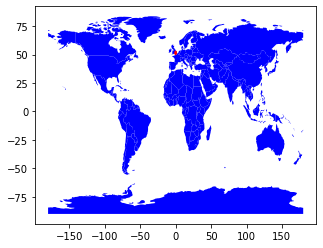

In [5]:
ax = world.plot(color="blue")
london_buffered.plot(color="red", ax=ax)

In [6]:
london = london.set_crs("EPSG:4326")

hex_grid = h3_from_boundary(london_buffered, 6)
hex_grid

,h3_ref,geometry
0,86195d2dfffffff,"POLYGON ((-0.85430 51.28187, -0.90126 51.27312..."
1,861864b47ffffff,"POLYGON ((0.32964 49.94058, 0.28404 49.93198, ..."
2,86194bd67ffffff,"POLYGON ((1.14708 50.53835, 1.10124 50.53027, ..."
3,861864a2fffffff,"POLYGON ((0.19284 49.91472, 0.14722 49.90605, ..."
4,86194e52fffffff,"POLYGON ((0.22914 52.12965, 0.18176 52.12161, ..."
...,...,...
2989,8618645a7ffffff,"POLYGON ((-1.15042 50.28949, -1.19665 50.28034..."
2990,86195d0a7ffffff,"POLYGON ((-1.10775 51.86443, -1.15525 51.85574..."
2991,86194aaefffffff,"POLYGON ((0.67569 50.72288, 0.62958 50.71465, ..."
2992,861959d17ffffff,"POLYGON ((-1.71662 51.41983, -1.76389 51.41074..."


<AxesSubplot:>

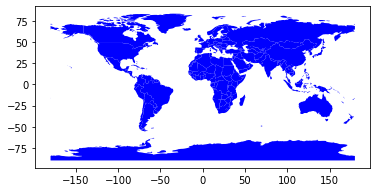

In [7]:
ax = world.plot(color="blue")
hex_grid.plot(color="red", ax=ax)

<AxesSubplot:>

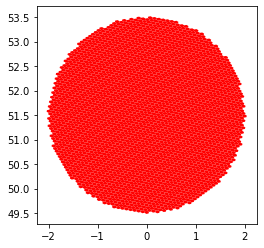

In [8]:
hex_grid.plot(color="red")



### From a point
Similarly, we can also use coordinates, choosing between OSGB (Eastings and Northing) or lat/long

In [9]:
lon_point_grid = h3_from_coordinates(10, 300, x=0, y=0, crs_type="osgb")

<AxesSubplot:>

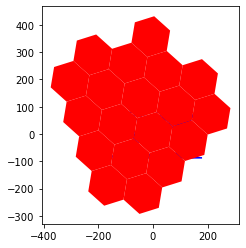

In [10]:
ax = world.plot(color="blue")
lon_point_grid.plot(color="red", ax=ax)

<AxesSubplot:>

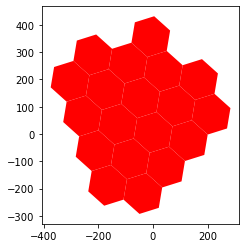

In [11]:
lon_point_grid.plot(color="red")
